In [1]:
import pymc as pm
import numpy as np
import matplotlib.pyplot as plt
import arviz as az
import pandas as pd

WARNING (pytensor.configdefaults): g++ not available, if using conda: `conda install gxx`
WARNING (pytensor.configdefaults): g++ not detected!  PyTensor will be unable to compile C-implementations and will default to Python. Performance may be severely degraded. To remove this warning, set PyTensor flags cxx to an empty string.


In [2]:
# Given Data
prior_mean = 5      # Prior belief (average oil price increase in $)
prior_std = 2       # Prior uncertainty
likelihood_mean = 8  # Observed data suggests price change of $8 per barrel
likelihood_std = 3   # Observed standard deviation
n = 10   # Number of observations

In [4]:
# Compute Posterior Mean and Variance
posterior_mean = ( (likelihood_std**2 * prior_mean) + (n * prior_std**2 * likelihood_mean) ) / (likelihood_std**2 + n * prior_std**2)
posterior_variance = (likelihood_std**2 * prior_std**2) / (likelihood_std**2 + n * prior_std**2)
posterior_std = np.sqrt(posterior_variance)

In [5]:
# Print Results
print(f"Posterior Mean: {posterior_mean:.3f}")
print(f"Posterior Std Dev: {posterior_std:.3f}")

Posterior Mean: 7.449
Posterior Std Dev: 0.857


In [6]:
# Monte Carlo Sampling
num_samples = 10000
prior_samples = np.random.normal(prior_mean, prior_std, num_samples)
likelihood_samples = np.random.normal(likelihood_mean, likelihood_std, num_samples)

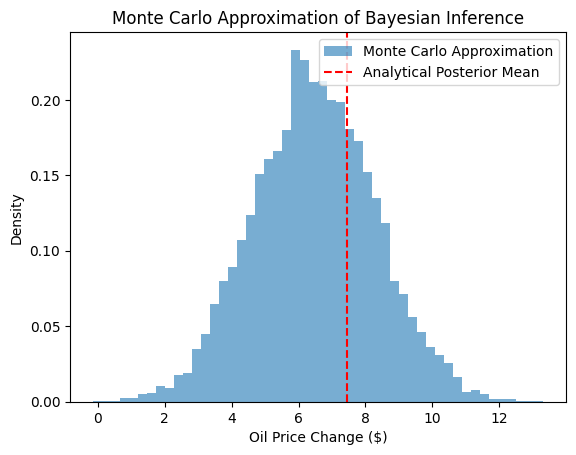

In [7]:
# Compute Weighted Posterior Samples
posterior_samples = (prior_samples + likelihood_samples) / 2  # Simple weighting approach

# Plot Results
plt.hist(posterior_samples, bins=50, density=True, alpha=0.6, label="Monte Carlo Approximation")
plt.axvline(posterior_mean, color='r', linestyle='dashed', label="Analytical Posterior Mean")
plt.xlabel("Oil Price Change ($)")
plt.ylabel("Density")
plt.legend()
plt.title("Monte Carlo Approximation of Bayesian Inference")
plt.show()

Initializing NUTS using jitter+adapt_diag...
Multiprocess sampling (4 chains in 4 jobs)
NUTS: [theta]


d:\AI-projects\brent_oil_changepoint_analysis\.venv\Lib\site-packages\rich\live.py:256: UserWarning: install 
"ipywidgets" for Jupyter support
  warnings.warn('install "ipywidgets" for Jupyter support')

Sampling 4 chains for 1_000 tune and 2_000 draw iterations (4_000 + 8_000 draws total) took 28 seconds.


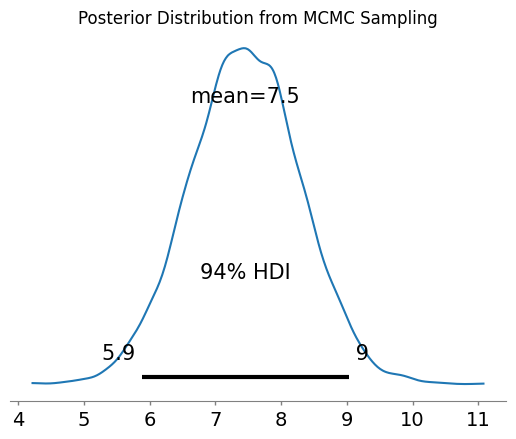

        mean     sd  hdi_3%  hdi_97%  mcse_mean  mcse_sd  ess_bulk  ess_tail  \
theta  7.452  0.844    5.88    9.036      0.015    0.009    3324.0    4864.0   

       r_hat  
theta    1.0  


In [8]:
import pymc as pm
import arviz as az

# Bayesian Modeling with PyMC
with pm.Model() as model:
    theta = pm.Normal("theta", mu=prior_mean, sigma=prior_std)  # Prior
    likelihood = pm.Normal("likelihood", mu=theta, sigma=likelihood_std, observed=[8]*10)  # Observed Data
    trace = pm.sample(2000, tune=1000, return_inferencedata=True)

# Plot Posterior Distribution
az.plot_posterior(trace, var_names=["theta"])
plt.title("Posterior Distribution from MCMC Sampling")
plt.show()

# Display Summary
summary = az.summary(trace, var_names=["theta"])
print(summary)
